# Forward-Time, Centered Space Convección-Difusión

In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import math

Consideremos la siguiente ecuación parabólica:

$u_t = D u_{xx} - c u_x$ para $0\leq x \leq L$ y $0 \leq t \leq T$

Con las condiciones de frontera:

$u(0,t)=0$ y $u(L,t)=0$ para $0\leq t \leq T$

Y con la condición inicial:

$u(x,0)=f(x)$ para $0\leq x \leq L$

Ahora cogeremos el número de nodos que tomaremos en cada intervalo. $Nx-1$ será el número de nodos interiores que tomaremos en el intervalo $[0,L]$ y $Nt-1$ será el número de nodos interiores que tomaremos en el intervalo $[0,T]$ (Es decir, si al final tendremos $Nt+1$ puntos contando los de los extremos en cada intervalo). 

A continuación, $a$ indica $\alpha$. Para comenzar de forma sencilla vamos a considerar $\alpha=1$.

In [3]:
from numpy import linspace, array

In [4]:
import ipywidgets

In [7]:
def conv_difusexp_1d(D, c, ua, ub, Nx, Nt, a, b, T1, T2):
    x = linspace(a, b, Nx+1)    # creamos la partición en el espacio
    dx = x[1] - x[0]            # paso del espacio
    t = linspace(T1, T2, Nt+1)    # creamos la partición en el tiempo
    dt = t[1] - t[0]             # paso del tiempo
    s = D*dt/dx**2
    k = c*dt/dx
    u   = zeros(Nx+1)           # vector u desconocido en el siguiente nivel de tiempo
    u_1 = zeros(Nx+1)           # vector u en el nivel de tiempo anterior
    def I(x):return sin(pi*x)

    u_1[Nx]=0

    for i in range(0, Nx):
        u_1[i] = I(x[i])
    u_1[0] = u_1[Nx] = 0
    
    v = [u_1]

    for n in range(0, Nt+1):
        for i in range(1, Nx):
            u[i] = s*u_1[i-1] + (1-2*s-k)*u_1[i]+(s-k)*u_1[i+1]
        u[0] = 0
        u[Nx] = 0
        v.extend([u])
        u_1 = u
        u=zeros(Nx+1) 
    return x, t, v

In [16]:
x_h, t_h, u_h = conv_difusexp_1d(1,0,0,0,10,3,0,1,0,1)
x_h
t_h
u_h

[array([ 0.        ,  0.30901699,  0.58778525,  0.80901699,  0.95105652,
         1.        ,  0.95105652,  0.80901699,  0.58778525,  0.30901699,  0.        ]),
 array([ 0.        , -0.69927422, -1.33009861, -1.83072368, -2.15214476,
        -2.26289891, -2.15214476, -1.83072368, -1.33009861, -0.69927422,  0.        ]),
 array([ 0.        ,  1.58238687,  3.0098787 ,  4.14274262,  4.87008603,
         5.12071149,  4.87008603,  4.14274262,  3.0098787 ,  1.58238687,  0.        ]),
 array([  0.        ,  -3.58078154,  -6.81105123,  -9.37460778,
        -11.0205124 , -11.58765248, -11.0205124 ,  -9.37460778,
         -6.81105123,  -3.58078154,   0.        ]),
 array([  0.        ,   8.10294666,  15.41272044,  21.21378976,
         24.93830552,  26.2216862 ,  24.93830553,  21.21378975,
         15.41272044,   8.10294665,   0.        ])]

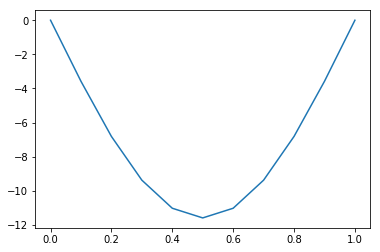

In [18]:
plot(x_h, u_h[3])

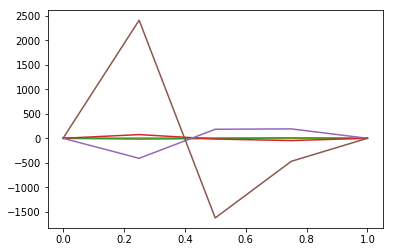

In [14]:
for i in range(1,7):
    plot(x_h, u_h[i])